In [113]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from scipy.optimize import fsolve, root

In [114]:
def parameters(filename, pl=False):
    # Read the data from the text file
    data = np.loadtxt(filename, skiprows=5)

    with open(filename, 'r') as file:
        header = file.readlines()[4]

    # Check if "RI" or "MA" is present in the 5th line
    if "RI" in header:
        frequency = data[:, 0]
        s11_mag = np.abs(data[:, 1]+1j*data[:, 2])
        s11_phase = np.angle(data[:, 1]+1j*data[:, 2], deg=True)
        s21_mag = np.abs(data[:, 3]+1j*data[:, 4])
        s21_phase = np.angle(data[:, 3]+1j*data[:, 4], deg=True)
        s12_mag = np.abs(data[:, 5]+1j*data[:, 6])
        s12_phase = np.angle(data[:, 5]+1j*data[:, 6], deg=True)
        s22_mag = np.abs(data[:, 7]+1j*data[:, 8])
        s22_phase = np.angle(data[:, 7]+1j*data[:, 8], deg=True)
    elif "MA" in header:
        frequency = data[:, 0]
        s11_mag = data[:, 1]
        s11_phase = data[:, 2]
        s21_mag = data[:, 3]
        s21_phase = data[:, 4]
        s12_mag = data[:, 5]
        s12_phase = data[:, 6]
        s22_mag = data[:, 7]
        s22_phase = data[:, 8]
    
    if pl == True:
        plot(filename)
    
    return frequency, s11_mag, s11_phase, s21_mag, s21_phase


In [115]:
def plot(filename):
    frequency, s11_mag, s11_phase, s21_mag, s21_phase = parameters(filename)
    
    # Create subplots
    fig, axs = plt.subplots(2, 2, figsize=(8, 8))
    print(filename)
    # Plot S11 magnitude and phase
    axs[0, 0].plot(frequency, s11_mag)
    axs[0, 0].set_title('S11 Magnitude')
    axs[0, 0].set_xlabel('Frequency (Hz)')
    axs[0, 0].set_ylabel('Magnitude')

    axs[0, 1].plot(frequency, s11_phase, color='orange', linewidth=0.8)
    axs[0, 1].set_title('S11 Phase')
    axs[0, 1].set_xlabel('Frequency (Hz)')
    axs[0, 1].set_ylabel('Phase (degrees)')

    # Plot S21 magnitude and phase
    axs[1, 0].plot(frequency, s21_mag)
    axs[1, 0].set_title('S21 Magnitude')
    axs[1, 0].set_xlabel('Frequency (Hz)')
    axs[1, 0].set_ylabel('Magnitude')

    axs[1, 1].plot(frequency, s21_phase, color='orange', linewidth=0.8)
    axs[1, 1].set_title('S21 Phase')
    axs[1, 1].set_xlabel('Frequency (Hz)')
    axs[1, 1].set_ylabel('Phase (degrees)')
    
    plt.subplots_adjust(hspace=0.3, wspace=0.3)
    plt.show()

First Order:  (-2.0103814734850722-0.6907994062351009j)
[-1.90009593  0.51793118]


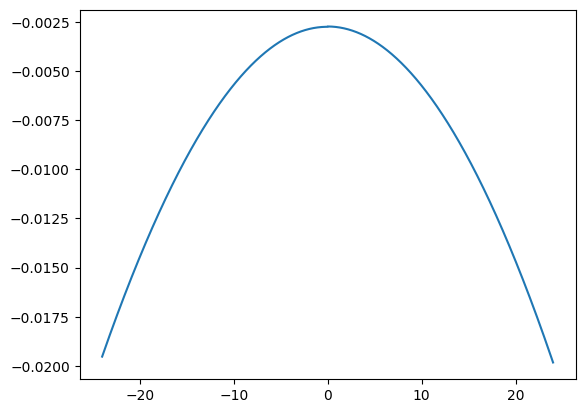

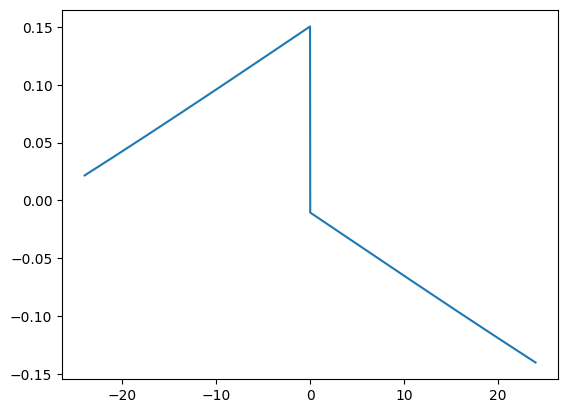

In [127]:
# Speed of light
c = 299792458

# Sample thickness
d=0.0127

filename = r'07032023_Ferrite_Meas_Current\FERRITE_SAMPLE_25A_DEEMBED.s2p'
frequency, s11_mag, s11_phase, s21_mag, s21_phase = parameters(filename,False)

# Phase correction
lambda_0 = c / frequency
phi_0 = 360 * d/lambda_0
s21_phase = s21_phase - phi_0

# Calculate the reflection and transmission coefficients
s11 = s11_mag * np.exp(1j * np.deg2rad(0)) # Not used
s21_list = s21_mag * np.exp(1j * np.deg2rad(+s21_phase))
s21 = s21_list[35]
k = np.pi * 2 * frequency[35] / c

ep=14.81+0.00148j

# First order approximation
mu = 2*(1-s21)/(1j*k*d)-ep
print("First Order: ",mu)

# Using solver
def func(x):
    mu=x[0]+1j*x[1]
    func = 2 * np.sqrt(mu / ep)/(2 * np.sqrt(mu / ep) * np.cosh(1j * np.sqrt(ep * mu) * k * d)+ (mu / ep + 1) * np.sinh(1j * np.sqrt(ep * mu) * k * d)) - s21
    return [np.real(func),np.imag(func)]

root = fsolve(func, [2,0.1])
print(root)

# Plotting
def equation(mu):
    return 2 * np.sqrt(mu / ep)/(2 * np.sqrt(mu / ep) * np.cosh(1j * np.sqrt(ep * mu) * k * d)
        + (mu / ep + 1) * np.sinh(1j * np.sqrt(ep * mu) * k * d)) - s21

mu=np.arange(-24,24,0.01)
val = equation(mu)
plt.plot(mu,np.real(val))
plt.show()
plt.plot(mu,np.imag(val))
plt.show()



In [117]:
filename = r'07032023_Ferrite_Meas_Current\FERRITE_SAMPLE_25A_DEEMBED.s2p'
frequency, s11_mag, s11_phase, s21_mag, s21_phase = parameters(filename,False)

# Phase correction
lambda_0 = c / frequency
phi_0 = 360 * d/lambda_0
s21_phase = s21_phase + phi_0

# Calculate the reflection and transmission coefficients
s11 = 0 * np.exp(1j * np.deg2rad(0))
s21_list = (1-0.0001) * np.exp(1j * np.deg2rad(-s21_phase))
k = np.pi * 2 * frequency[35] / c
print(np.exp(1j*k*d))
epsilon = 1
mu = 2*(1-s21)/(1j*k*d)-epsilon
print(mu)

(0.9999401784786658+0.010937982631820754j)
(7.811953516480177-0.4529182647065406j)


Solver for $\mu$

C:\Users\bgladwyn\AppData\Local\Temp\ipykernel_22048\1054262162.py:10: RuntimeWarning: invalid value encountered in sqrt
  return 2 * np.sqrt(mu / ep)/(2 * np.sqrt(mu / ep) * np.cosh(1j * np.sqrt(ep * mu) * k * d)
C:\Users\bgladwyn\AppData\Local\Temp\ipykernel_22048\1054262162.py:11: RuntimeWarning: invalid value encountered in sqrt
  + (mu / ep + 1) * np.sinh(1j * np.sqrt(ep * mu) * k * d)) - s21
C:\Users\bgladwyn\AppData\Local\Temp\ipykernel_22048\1054262162.py:10: RuntimeWarning: invalid value encountered in divide
  return 2 * np.sqrt(mu / ep)/(2 * np.sqrt(mu / ep) * np.cosh(1j * np.sqrt(ep * mu) * k * d)


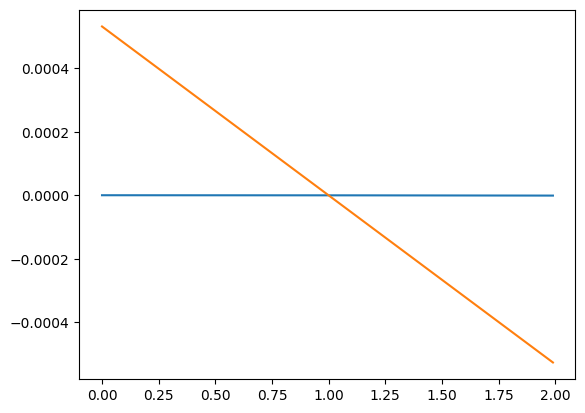

[1.1102230246251565e-16, 0.0]
[ 1.00000000e+00 -1.03674051e-13]


In [118]:
#ep = 14.81 + 14.82*0.00010j

s11=0
k = np.pi * 2 * 4000000 / c
s21=np.exp(-1j*k*d)
ep = 1

# Define the equation
def equation(mu):
    return 2 * np.sqrt(mu / ep)/(2 * np.sqrt(mu / ep) * np.cosh(1j * np.sqrt(ep * mu) * k * d)
        + (mu / ep + 1) * np.sinh(1j * np.sqrt(ep * mu) * k * d)) - s21

mu=np.arange(-2,2,0.01)
val = equation(mu)
plt.plot(mu,np.real(val))
plt.plot(mu,np.imag(val))
plt.show()

def func(x):
    mu=x[0]+1j*x[1]
    func = 2 * np.sqrt(mu / ep)/(2 * np.sqrt(mu / ep) * np.cosh(1j * np.sqrt(ep * mu) * k * d)+ (mu / ep + 1) * np.sinh(1j * np.sqrt(ep * mu) * k * d)) - s21
    return [np.real(func),np.imag(func)]
print(func([1,0]))
root = fsolve(func, [0.9,0.1])
print(root)

# Initial guess for mu
#mu_guess = np.array([2+1j])

# Solve the equation numerically
#mu_solution = fsolve(equation, mu_guess)

#print(mu_solution)

ValueError: x and y must have same first dimension, but have shapes (400,) and (1,)

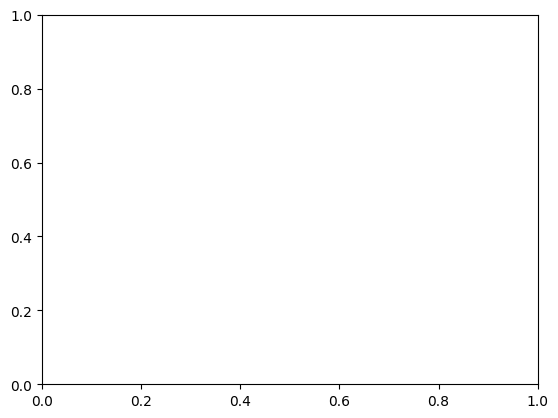

In [119]:
# Define the equation
def equation(mu_split):
    mu = mu_split[0] + 1j * mu_split[1]
    return [(2 * np.sqrt(mu / ep)/(2 * np.sqrt(mu / ep) * np.cosh(1j * np.sqrt(ep * mu) * k * d)
        + (mu / ep + 1) * np.sinh(1j * np.sqrt(ep * mu) * k * d)) - s21).real,
            (2 * np.sqrt(mu / ep)/(2 * np.sqrt(mu / ep) * np.cosh(1j * np.sqrt(ep * mu) * k * d)
        + (mu / ep + 1) * np.sinh(1j * np.sqrt(ep * mu) * k * d)) - s21).real]

mu=np.arange(-2,2,0.01)
val = equation(mu)
plt.plot(mu,val[0])
plt.show()

root = fsolve(equation, [1,0])
print(root)

In [ ]:
# Define the equation for the real part of mu
def real_equation(mu_real):
    mu = mu_real + 1j * mu_imag
    numerator = 2 * np.sqrt(mu / ep)
    denominator = (
        2 * np.sqrt(mu / ep) * np.cosh(1j * np.sqrt(ep * mu) * k * d)
        + (mu / ep + 1) * np.sinh(1j * np.sqrt(ep * mu) * k * d)
    )

    return numerator.real / denominator.real - s21.real

# Define the equation for the imaginary part of mu
def imag_equation(mu_imag):
    mu = mu_real + 1j * mu_imag
    numerator = 2 * np.sqrt(mu / ep)
    denominator = (
        2 * np.sqrt(mu / ep) * np.cosh(1j * np.sqrt(ep * mu) * k * d)
        + (mu / ep + 1) * np.sinh(1j * np.sqrt(ep * mu) * k * d)
    )

    return numerator.imag / denominator.imag - s21.imag

mu_real = 1
mu_imag = 0.1

# Solve the equations numerically
mu_real_solution = fsolve(real_equation, mu_real)
mu_imag_solution = fsolve(imag_equation, mu_imag)

mu_solution = mu_real_solution + 1j * mu_imag_solution
print(mu_solution)

[2.12206463+0.00024008j]


C:\Users\bgladwyn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


Broken solvers

In [ ]:
mu_real, mu_imag, ep_real, ep_imag = sym.symbols('mu_real mu_imag ep_real ep_imag')

mu = mu_real + sym.I * mu_imag
ep = ep_real + sym.I * ep_imag

def func(mu_real, mu_imag, ep_real, ep_imag):
    mu_val = mu_real + sym.I * mu_imag
    ep_val = ep_real + sym.I * ep_imag

    eq1 = (mu_val / ep_val - 1) * sym.sinh(1j * sym.sqrt(ep_val * mu_val) * k * d) / (
            2 * sym.sqrt(mu_val / ep_val) * sym.cosh(1j * sym.sqrt(ep_val * mu_val) * k * d) + (
            mu_val / ep_val + 1) * sym.sinh(1j * sym.sqrt(ep_val * mu_val) * k * d)) - s11

    eq2 = 2 * sym.sqrt(mu_val / ep_val) / (
            2 * sym.sqrt(mu_val / ep_val) * sym.cosh(1j * sym.sqrt(ep_val * mu_val) * k * d) + (
            mu_val / ep_val + 1) * sym.sinh(1j * sym.sqrt(ep_val * mu_val) * k * d)) - s21

    return sym.re(eq1), sym.im(eq1), sym.re(eq2), sym.im(eq2)

# Create lambdified functions for each equation
func_numeric = sym.lambdify((mu_real, mu_imag, ep_real, ep_imag), func(mu_real, mu_imag, ep_real, ep_imag),
                            modules='numpy')

# Create a function that combines all the equations
def combined_func(vars):
    mu_real, mu_imag, ep_real, ep_imag = vars
    return func_numeric(mu_real, mu_imag, ep_real, ep_imag)

# Solve the equations numerically
root = fsolve(combined_func, [2, 2, 2, 1])
print(root)

AttributeError: 'ImmutableDenseNDimArray' object has no attribute 'as_coefficient'

In [ ]:
c = 299792458
lambda_0 = (c / 40000000)
s11=0
s21 = np.exp(1j * np.deg2rad(d * 360 / lambda_0))
k=2*np.pi/lambda_0

mu, ep = sym.symbols('mu ep', complex=True)
eq1 = (mu / ep - 1) * sym.sinh(1j * sym.sqrt(ep * mu) * k * d) / (
            2 * sym.sqrt(mu / ep) * sym.cosh(1j * sym.sqrt(ep * mu) * k * d) + (
            mu / ep + 1) * sym.sinh(1j * sym.sqrt(ep * mu) * k * d)) - s11

eq2 = 2 * sym.sqrt(mu / ep) / (
            2 * sym.sqrt(mu / ep) * sym.cosh(1j * sym.sqrt(ep * mu) * k * d) + (
            mu / ep + 1) * sym.sinh(1j * sym.sqrt(ep * mu) * k * d)) - s21

# Convert symbolic equations to numerical expressions
eq1_numeric = sym.lambdify((mu, ep), [sym.re(eq1), sym.im(eq1)], modules='numpy')
eq2_numeric = sym.lambdify((mu, ep), [sym.re(eq2), sym.im(eq2)], modules='numpy')

# Define the function to solve
def func(x):
    mu_val, ep_val = x[0] + 1j * x[1], x[2] + 1j * x[3]
    return np.concatenate((eq1_numeric(mu_val, ep_val), eq2_numeric(mu_val, ep_val)))

# Initial guess for the roots
x0 = [12.0, 0.01, 10.0, 0.01]

# Solve the equations numerically
root = fsolve(func, x0)

# Extract the real and imaginary parts of mu and ep
mu_root = root[0] + 1j * root[1]
ep_root = root[2] + 1j * root[3]

print(mu_root)
print(ep_root)

(-0.021946444052283107+0.19006298650767456j)
(0.017772099494259657+0.15386510705092143j)


C:\Users\bgladwyn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [ ]:
# Solver for mu
s21,ep,mu,d,k = sym.symbols('s21,ep,mu,d,k')
eq1 = sym.Eq(s21, 2*sym.sqrt(mu/ep)/(2*sym.sqrt(mu/ep)*sym.cosh(1j*sym.sqrt(ep*mu)*k*d)+(mu/ep+1)*sym.sinh(1j*sym.sqrt(ep*mu)*k*d))) 
result = sym.solve([eq1],(mu))
print(result)

NotImplementedError: could not solve 2*ep*sqrt(mu/ep) - s21*(2*ep*sqrt(mu/ep)*cos(d*k*sqrt(ep*mu)) + I*(ep + mu)*sin(d*k*sqrt(ep*mu)))

In [ ]:
# Solver for s-matrix equations
s11,s21,ep,mu,g,lambda_0,d,k = sym.symbols('s11,s21,ep,mu,g,lambda_0,d,k')
eq1 = sym.Eq(g, 1j*sym.sqrt(ep*mu)*lambda_0)
eq2 = sym.Eq(k, (2*sym.sqrt(mu/ep)*sym.cosh(g*d)+(mu/ep+1)*sym.sinh(g*d)))
eq3 = sym.Eq(s11, (mu/ep-1)*sym.sinh(g*d)/k)
eq4 = sym.Eq(s21, 2*sym.sqrt(mu/ep)*1/k) 
result = sym.solve([eq1,eq2,eq3,eq4],(ep,mu))
print(result)

In [ ]:
# Solver for s-matrix equations
s11,s21,ep,mu,d,k = sym.symbols('s11,s21,ep,mu,d,k')
eq1 = sym.Eq(s11, (mu/ep-1)*sym.sinh(1j*sym.sqrt(ep*mu)*k*d)/(2*sym.sqrt(mu/ep)*sym.cosh(1j*sym.sqrt(ep*mu)*k*d)+(mu/ep+1)*sym.sinh(1j*sym.sqrt(ep*mu)*k*d)))
eq2 = sym.Eq(s21, 2*sym.sqrt(mu/ep)*1/(2*sym.sqrt(mu/ep)*sym.cosh(1j*sym.sqrt(ep*mu)*k*d)+(mu/ep+1)*sym.sinh(1j*sym.sqrt(ep*mu)*k*d))) 
result = sym.solve([eq1,eq2],(ep,mu))
print(result)

NotImplementedError: could not solve 2*ep*sqrt(mu/ep) - s21*(2*ep*sqrt(mu/ep)*cos(d*k*sqrt(ep*mu)) + I*(ep + mu)*sin(d*k*sqrt(ep*mu)))